In [1]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [2]:
df_us=df[df['job_country']=='United States'].dropna(subset='salary_year_avg')

In [19]:
job_titles = df_us['job_title_short'].value_counts().head(6).index

In [22]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [30]:
job_order=df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

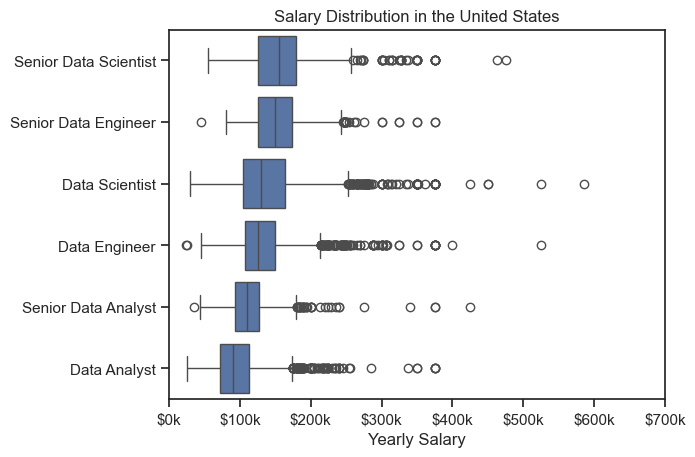

In [31]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')


plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))
plt.xlim(0, 700000)

plt.show()

In [34]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset='salary_year_avg')
df_da_us=df_da_us.explode('job_skills')

In [36]:
df_da_top_pay=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [37]:
df_da_top_pay=df_da_top_pay.head(10)

In [46]:
df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [39]:
df_da_skills=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)



In [42]:
df_da_skills=df_da_skills.head(10).sort_values(by='median', ascending=False)

In [44]:
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


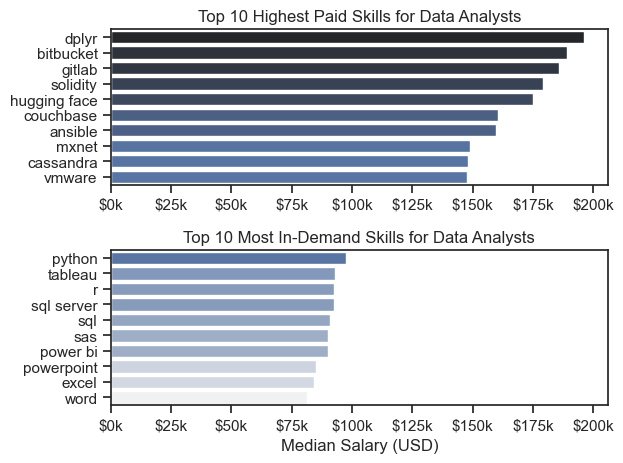

In [45]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')



sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')

ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))




sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b')

ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))
fig.tight_layout()
plt.show()